In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
happiness = pd.read_csv('2019.csv')

# Exploring Data

In [ ]:
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# This will be the dashboard

In [10]:
# smallest or largest, top or bottom number, and column
largest = happiness.nlargest(10, 'Healthy life expectancy')
largest

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
75,76,Hong Kong,5.430,1.438,1.277,1.122,0.440,0.258,0.287
57,58,Japan,5.886,1.327,1.419,1.088,0.445,0.069,0.140
29,30,Spain,6.354,1.286,1.484,1.062,0.362,0.153,0.079
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
23,24,France,6.592,1.324,1.472,1.045,0.436,0.111,0.183
48,49,Cyprus,6.046,1.263,1.223,1.042,0.406,0.190,0.041
63,64,Northern Cyprus,5.718,1.263,1.252,1.042,0.417,0.191,0.162
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
35,36,Italy,6.223,1.294,1.488,1.039,0.231,0.158,0.030


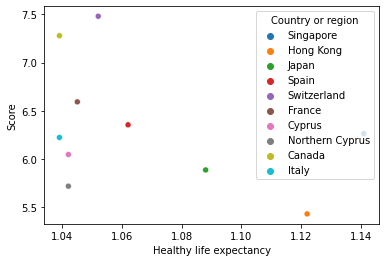

In [17]:
_ = sns.scatterplot(x = largest['Healthy life expectancy'], y = largest['Score'], hue = largest['Country or region'])

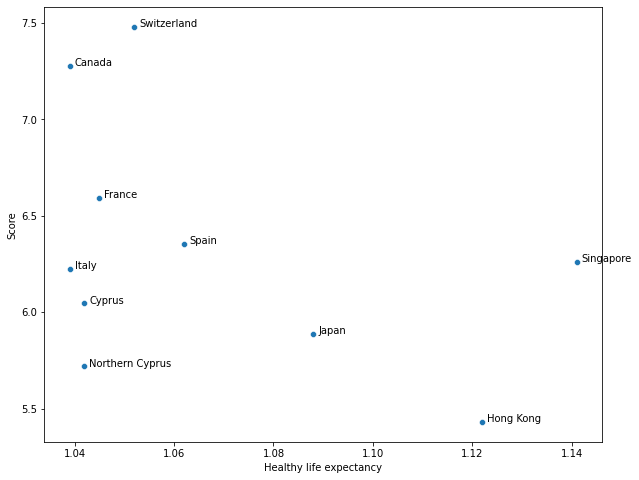

In [23]:
plt.figure(figsize=(10,8))
_ = sns.scatterplot(x = largest['Healthy life expectancy'], y = largest['Score'])

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + .001, point['y'], str(point['val']))

label_point(largest['Healthy life expectancy'], largest['Score'], largest['Country or region'], plt.gca())  

# Making the initial model

In [ ]:
# renaming columns so we can run the initial model

happiness.rename(columns = {'Perceptions of corruption':'Perceptions_of_corruption'}, inplace = True)
happiness.rename(columns = {'GDP per capita':'GDP_per_capita'}, inplace = True)
happiness.rename(columns = {'Social support':'Social_support'}, inplace = True)
happiness.rename(columns = {'Healthy life expectancy':'Healthy_life_expectancy'}, inplace = True)
happiness.rename(columns = {'Freedom to make life choices':'Freedom_to_make_life_choices'}, inplace = True)

In [ ]:
# The initial model
model1 = smf.ols('''Score ~ GDP_per_capita + Social_support + Healthy_life_expectancy +  
                Freedom_to_make_life_choices + Generosity + Perceptions_of_corruption''', 
                data=happiness).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     87.62
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           2.40e-46
Time:                        04:34:15   Log-Likelihood:                -119.76
No. Observations:                 156   AIC:                             253.5
Df Residuals:                     149   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.7952      0.211      8.505      0.000       1.378       2.212
GDP_per_capita                   0.7754      0.218      3.553      0.001       0.344       1.207
Social_support                   1.1242      0.237      4.745      0.000       0.656       1.592
Healthy_life_expectancy          1.0781      0.335      3.223      0.002       0.417       1.739
Freedom_to_make_life_choices     1.4548      0.375      3.876      0.000       0.713       2.197
Generosity                       0.4898      0.498      0.984      0.327      -0.494       1.473
Perceptions_of_corruption        0.9723      0.542      1.793      0.075      -0.099       2.044
==============================================================================
Omnibus:                        8.188   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.971
Skew:                          -0.498   Prob(JB):                       0.0186
Kurtosis:                       3.483   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

is this model useful? 

(array([ 1.,  1.,  3.,  2.,  3.,  7., 19., 17., 20., 25., 26., 16.,  7.,
         7.,  2.]),
 array([-1.75304358, -1.55680142, -1.36055926, -1.16431711, -0.96807495,
        -0.77183279, -0.57559064, -0.37934848, -0.18310632,  0.01313583,
         0.20937799,  0.40562015,  0.6018623 ,  0.79810446,  0.99434662,
         1.19058877]),
 <BarContainer object of 15 artists>)

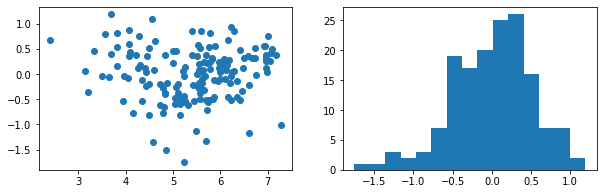

In [ ]:
# Checking Linear Assumptions, will be explained later :)
# CODE FOR predicted vs. residuals and histogram
# Note for later: consider a function since we will have another model?
plt.rcParams.update({'figure.figsize':(10, 3)})

pred_val = model1.fittedvalues.copy()
true_val = happiness['Score'].values.copy()
residual = true_val - pred_val

plt.subplot(121)
plt.scatter(pred_val, residual)

plt.subplot(122)
plt.hist(residual, bins = 15)

- Linearity: Residual plot looks fairly random but there may be a curve so it might be best to check out if there is anything weird!
- Constant Variability: .......
- Normal distribution: slightly left skewed, but nothing to worry about
- Independence of design: .......

/opt/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


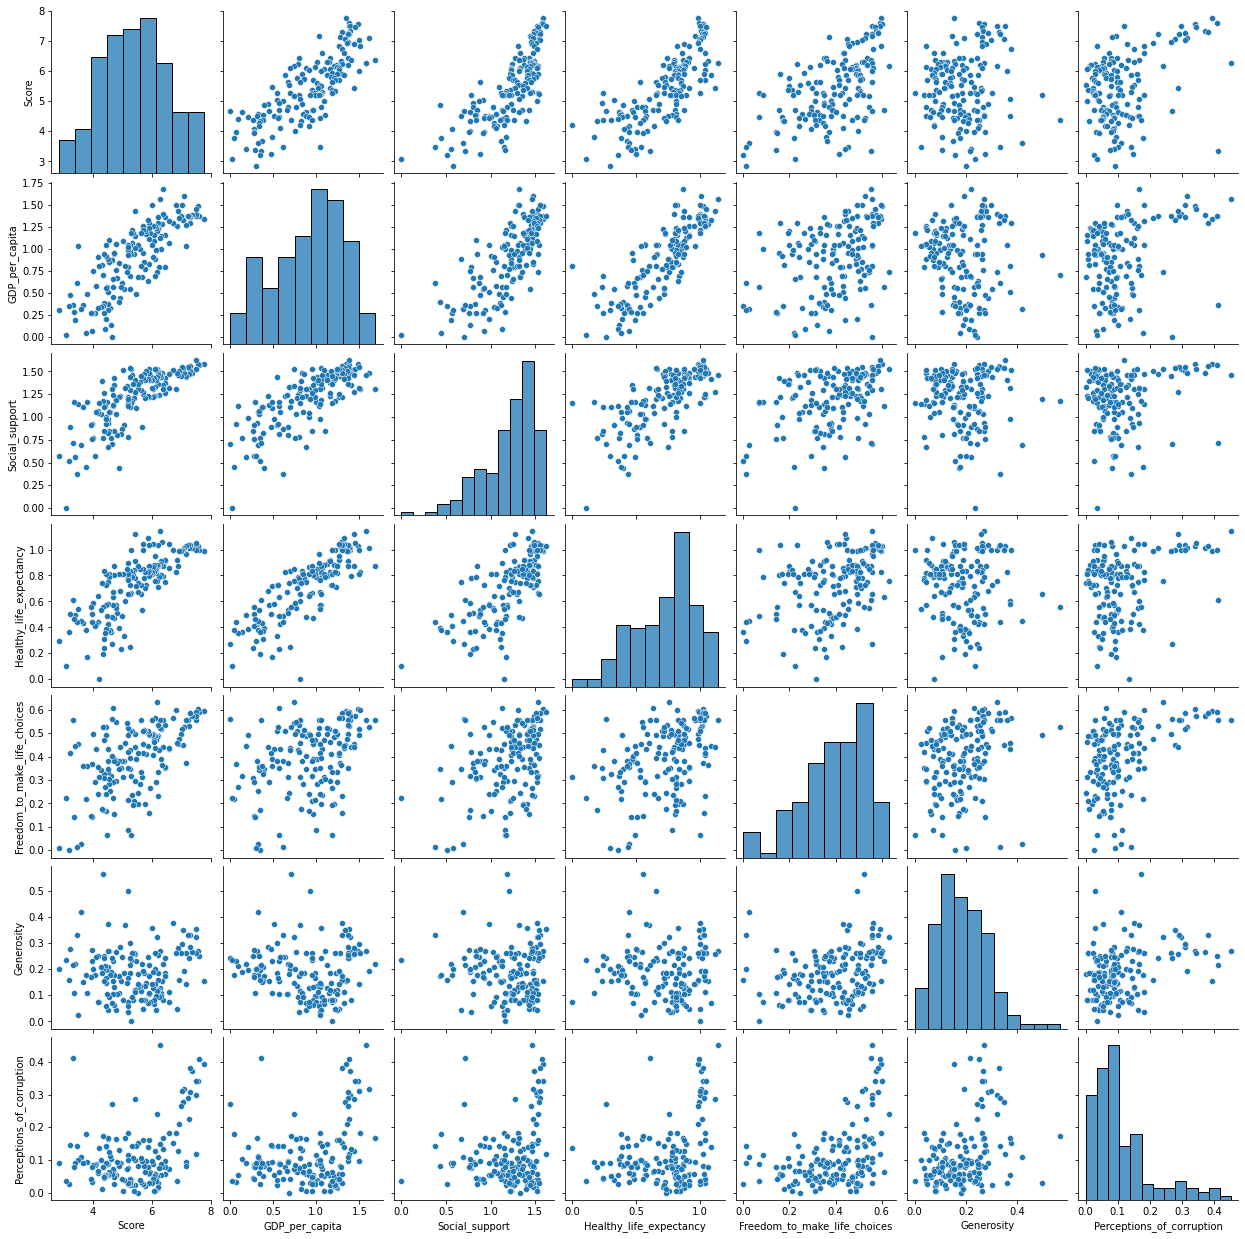

In [ ]:
# Checking the variables for any weird stuff

sub_happy = happiness[['Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 
                       'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption']]
sns.pairplot(sub_happy, size=2.5)

# TRANSFORMATION

In [ ]:
# transforming generosity and corruption
sub_happy['sq_Social'] = sub_happy['Social_support'] ** 2
sub_happy['log_Corruption'] = np.log(sub_happy['Perceptions_of_corruption'])
sub_happy.head()

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/venv/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,sq_Social,log_Corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.518569,-0.933946
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.474329,-0.891598
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.502724,-1.075873
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2.637376,-2.137071
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.316484,-1.210662


In [ ]:
sub_happy = sub_happy.copy()
sub_happy.replace([np.inf, -np.inf], np.nan, inplace=True) 
  
# Dropping all the rows with nan values
sub_happy.dropna(inplace=True) 
  
# Printing df 
len(sub_happy)


155

In [ ]:
model2 = smf.ols('''Score ~ GDP_per_capita + Social_support + sq_Social + Healthy_life_expectancy +  
                Freedom_to_make_life_choices + Generosity + log_Corruption''', 
                data=sub_happy).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     81.79
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.70e-47
Time:                        04:37:49   Log-Likelihood:                -113.46
No. Observations:                 155   AIC:                             242.9
Df Residuals:                     147   BIC:                             267.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.2150      0.426      7.547      0.000       2.373       4.057
GDP_per_capita                   0.6943      0.214      3.241      0.001       0.271       1.118
Social_support                  -1.3010      0.734     -1.773      0.078      -2.751       0.149
sq_Social                        1.2195      0.354      3.444      0.001       0.520       1.919
Healthy_life_expectancy          1.0576      0.324      3.265      0.001       0.417       1.698
Freedom_to_make_life_choices     1.5431      0.362      4.258      0.000       0.827       2.259
Generosity                       0.3580      0.476      0.753      0.453      -0.582       1.298
log_Corruption                   0.0770      0.052      1.493      0.138      -0.025       0.179
==============================================================================
Omnibus:                        3.806   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                3.351
Skew:                          -0.343   Prob(JB):                        0.187
Kurtosis:                       3.222   Cond. No.                         78.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([ 1.,  1.,  2.,  2.,  6., 12., 16., 20., 21., 26., 21., 13.,  8.,
         5.,  1.]),
 array([-1.66154327, -1.46979075, -1.27803824, -1.08628572, -0.8945332 ,
        -0.70278068, -0.51102816, -0.31927564, -0.12752312,  0.0642294 ,
         0.25598192,  0.44773444,  0.63948696,  0.83123948,  1.022992  ,
         1.21474451]),
 <BarContainer object of 15 artists>)

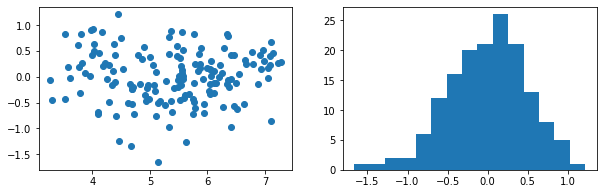

In [ ]:
plt.rcParams.update({'figure.figsize':(10, 3)})

pred_val = model2.fittedvalues.copy()
true_val = sub_happy['Score'].values.copy()
residual = true_val - pred_val

plt.subplot(121)
plt.scatter(pred_val, residual)

plt.subplot(122)
plt.hist(residual, bins = 15)

# TESTING MODEL ON 2018 DATA

In [ ]:
happy_old = pd.read_csv('2018.csv')
happy_old.head()

,Rank,Country,Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption,Residual
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.192,0.393,2.988
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.723
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.779
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.564
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.675


In [ ]:
happy_old['sq_Social'] = happy_old['Social_Support'] ** 2
happy_old['log_Corruption'] = np.log(happy_old['Perceptions_Of_Corruption'])
happy_old.head()

/opt/venv/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Rank,Country,Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption,Residual,sq_Social,log_Corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.192,0.393,2.988,2.534464,-0.933946
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.723,2.502724,-1.078810
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.779,2.528100,-0.896488
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.564,2.702736,-1.980502
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.675,2.399401,-1.030019


In [ ]:
happy_old = happy_old.copy()
happy_old.replace([np.inf, -np.inf], np.nan, inplace=True) 
  
# Dropping all the rows with nan values
happy_old.dropna(inplace=True) 

In [ ]:
def test_model(df):
    predicted_scores = []
    for row in range(len(df)):
        pred_score = 3.2150 + (df.iloc[row, 0]*0.6943) + (df.iloc[row, 1]*(-1.301))  + (df.iloc[row, 2]*1.2195) + (df.iloc[row, 3]*1.0576) + (df.iloc[row, 4]*1.5431) + (df.iloc[row, 5]*0.358) + (df.iloc[row, 6]*0.0770)
        predicted_scores.append(pred_score)
    return predicted_scores

In [ ]:
old_predictors = happy_old[['GDP_Per_Capita', 'Social_Support', 'sq_Social', 'Healthy_Life_Expectancy',  
                'Freedom_To_Make_Life_Choices', 'Generosity', 'log_Corruption']]

predict_2018 = test_model(old_predictors)
predict_2018

[7.112664031632309,
 7.208270574074362,
 7.172003765947496,
 7.289787929275481,
 7.1229042182154085,
 6.862487453956542,
 6.98260340309058,
 7.155054972476996,
 6.9611334571852845,
 7.114178639356242,
 6.274969461057723,
 6.813730701511212,
 6.327970002815153,
 7.1094409318687095,
 6.6918322249624085,
 6.689440876115709,
 7.054750209999386,
 6.569752325891451,
 6.836811582123166,
 6.341300263413819,
 6.863363114453671,
 6.490386553136314,
 5.605834392171617,
 5.803823970559721,
 6.218215995173475,
 6.193782675450523,
 5.958350260233196,
 6.142039683103825,
 5.5037860620505565,
 6.354471057021157,
 6.491106912869081,
 5.932315288675687,
 7.029268584117228,
 5.464650324699116,
 6.531078013695097,
 5.811234449770358,
 6.077533492914191,
 6.01688425339875,
 5.238923265057723,
 5.554118813340185,
 6.200098368937071,
 6.2227819808820515,
 6.483666496269239,
 6.065655173265004,
 6.113886957927333,
 6.095158210301866,
 5.7729851577125935,
 5.116780763487751,
 5.815696538148935,
 6.578136919238

In [ ]:
happy_old['Predicted Score'] = predict_2018
happy_old.head()

,Rank,Country,Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption,Residual,sq_Social,log_Corruption,Predicted Score
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.192,0.393,2.988,2.534464,-0.933946,7.112664
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.723,2.502724,-1.078810,7.208271
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.779,2.528100,-0.896488,7.172004
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.564,2.702736,-1.980502,7.289788
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.675,2.399401,-1.030019,7.122904


In [ ]:
accuracy = []
for row in happy_old.index:
    minimum = (happy_old['Score'][row]) - (happy_old['Score'][row])*.10
    maximum = (happy_old['Score'][row]) + (happy_old['Score'][row])*.10
    if happy_old['Predicted Score'][row] >= minimum and happy_old['Predicted Score'][row] <= maximum:
        accuracy.append(True)
    else:
        accuracy.append(False)

accuracy

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 Fal

In [ ]:
count = 0
for x in accuracy:
    if x == True:
        count += 1

count/len(accuracy)

0.6993464052287581